In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = "C:/Users/chloe/Downloads/full_dataset.csv"
df = pd.read_csv(url)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = "C:/Users/chloe/Downloads/data_propres.csv"



In [370]:
df['arrival_delay_minutes'] = df['arrival_delay']/60

In [371]:
df['arrival_delay_minutes'].describe()

count    67600.000000
mean         1.438603
std          2.753863
min       -110.433333
25%         -0.050000
50%          1.066667
75%          2.716667
max         20.616667
Name: arrival_delay_minutes, dtype: float64

In [372]:
from datetime import datetime

In [373]:
df['departure_time_real'] = df['departure_time_real'].astype('str')
df['arrival_time_real'] = df['arrival_time_real'].astype('str')

In [374]:
def func(val):
    if isinstance(val, str) and val != 'nan':
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S')
    else:
        return None

df['dwell_time'] = df['departure_time_real'].apply(func)-df['arrival_time_real'].apply(func)

In [375]:
df['dwell_time'].describe()

count                        67599
mean     0 days 00:00:25.597242562
std      0 days 00:00:56.997688886
min                0 days 00:00:00
25%                0 days 00:00:08
50%                0 days 00:00:14
75%                0 days 00:00:25
max                0 days 01:50:56
Name: dwell_time, dtype: object

In [376]:
df.head()

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,drop_off_booking_rule_id,stop_name,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time
0,14010000664357958,20250309,0,7,9022001010188001,2025-03-09 23:49:59,90.0,2025-03-09 23:50:07,98.0,61,...,NaN,Stadsbiblioteket,59.343836,18.054827,0,9.021001e+15,NaN,sl-tripupdates-2025-03-09T23-59-37Z.pb,1.500000,0 days 00:00:08
1,14010000664268451,20250309,0,12,9022001010383001,2025-03-09 23:50:01,2.0,2025-03-09 23:50:01,2.0,53,...,NaN,Tegelbacken,59.328257,18.062358,0,9.021001e+15,C,sl-tripupdates-2025-03-09T23-59-50Z.pb,0.033333,0 days 00:00:00
2,14010000664357819,20250309,0,18,9022001010583002,2025-03-09 23:49:06,-34.0,2025-03-09 23:49:06,-34.0,61,...,NaN,Fleminggatan,59.333282,18.045569,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-00-32Z.pb,-0.566667,0 days 00:00:00
3,14010000664357958,20250309,0,8,9022001010151001,2025-03-09 23:51:00,60.0,2025-03-09 23:51:08,68.0,61,...,NaN,Odenplan,59.342516,18.049194,0,9.021001e+15,G,sl-tripupdates-2025-03-10T00-00-46Z.pb,1.000000,0 days 00:00:08
4,14010000664357819,20250309,0,19,9022001010282001,2025-03-09 23:50:24,-39.0,2025-03-09 23:50:29,-34.0,61,...,NaN,Tegnérgatan,59.337624,18.049705,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-01-00Z.pb,-0.650000,0 days 00:00:05


In [377]:
df['stop_headsign'].unique()

array(['Hornsberg', 'Henriksdalsberget', 'Ruddammen',
       'Karolinska institutet', 'Sickla udde via Södersjukhuset',
       'Hornsberg via Södersjukhuset', 'Sickla udde'], dtype=object)

# Cleaning of the annoying trips

In [378]:
#exclusion des bus stops passant par l'arrêt bizarre
list_trip_id = []
def do_you_stop(u) :
  if u['stop_name']=='Södersjukhuset':
    list_trip_id.append(u['trip_id'])
  elif u['stop_headsign'] in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']:
    list_trip_id.append(u['trip_id'])
  return None

df.apply(do_you_stop, axis=1)
list_trip_id = list(set(list_trip_id))


In [379]:
df_annoying = df.loc[(df['trip_id'].isin(list_trip_id))
        & (~df['stop_name'].isin(['Södersjukhuset','Roselund','Södra station'])) 
        #& (df['stop_headsign'].isin(['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset'])))
                    ]

def annoying_trips(u):
    if u['stop_headsign'] in ['Sickla udde via Södersjukhuset']:
        return 'Sickla udde'
    if u['stop_headsign'] in ['Hornsberg via Södersjukhuset']:
        return 'Hornsberg'
    else:
        return u['stop_headsign']
    
def annoying_sequences(u):
    if u['stop_headsign'] not in ['Sickla udde via Södersjukhuset','Hornsberg via Södersjukhuset']: 
        #if it isn't in the headsign, they already passed it
        u['stop_sequence_sched']-=1 
    return u['stop_sequence_sched']

df_annoying['stop_sequence_sched'] = df_annoying.apply(annoying_sequences, axis=1)

df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)

C:\Users\chloe\AppData\Local\Temp\ipykernel_1604\1256966877.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_sequence_sched'] = df_annoying.apply(annoying_sequences, axis=1)
C:\Users\chloe\AppData\Local\Temp\ipykernel_1604\1256966877.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_headsign'] = df_annoying.apply(annoying_trips, axis=1)


In [380]:

df_clean = pd.concat([df_annoying,df[~df['trip_id'].isin(list_trip_id)]])


In [381]:
#getting rid of the outliers : the whole trip when there is a problem on one stop

outi = []
def outlier_cleaning(u):
    if np.abs(u['arrival_delay_minutes'])>15:
        if u['stop_sequence_sched'] > 1:
            outi.append(u['trip_id'])
    return None
df_clean.apply(outlier_cleaning, axis=1)
outi= list(set(outi))
df_clean = df_clean[~df_clean['trip_id'].isin(outi)]


In [382]:
df_clean.to_csv('data_propres.csv')

In [383]:
df = df_clean

In [296]:
df_test.head()

,trip_id,start_date,schedule_relationship,stop_sequence_real_x,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,stop_lat,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time,stop_sequence_real_y,percentage
0,14010000664218434,20250310,0,1,9022001010262001,2025-03-10 06:02:14,-106.0,2025-03-10 06:04:03,3.0,74,...,59.339563,18.004969,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-1.766667,0 days 00:01:49,1.0,0
1,14010000664218434,20250310,0,2,9022001010429004,2025-03-10 06:05:18,-10.0,2025-03-10 06:05:28,0.0,74,...,59.337527,18.008290,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-0.166667,0 days 00:00:10,2.0,0
2,14010000664218434,20250310,0,3,9022001010473002,2025-03-10 06:06:53,-10.0,2025-03-10 06:07:11,8.0,74,...,59.333497,18.016235,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-17-09Z.pb,-0.166667,0 days 00:00:18,3.0,0
3,14010000664218434,20250310,0,4,9022001010421001,2025-03-10 06:09:12,0.0,2025-03-10 06:09:21,9.0,74,...,59.331148,18.023381,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-19-58Z.pb,0.000000,0 days 00:00:09,4.0,0
4,14010000664218434,20250310,0,5,9022001010645001,2025-03-10 06:10:52,18.0,2025-03-10 06:11:04,30.0,74,...,59.327891,18.022024,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-21-35Z.pb,0.300000,0 days 00:00:12,5.0,"0,164345404"


# Data processing

74
Sickla udde
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 14]
74
Hornsberg
[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21  9]
61
Hornsberg
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27  1  2  3
  4  5  6]
61
Ruddammen
[18 19 20 21 22 23 24 25 26 27 28 29  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17]
53
Henriksdalsberget
[12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7  8  9 10 11]
53
Karolinska institutet
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22  1  2  3  4  5  6  7]


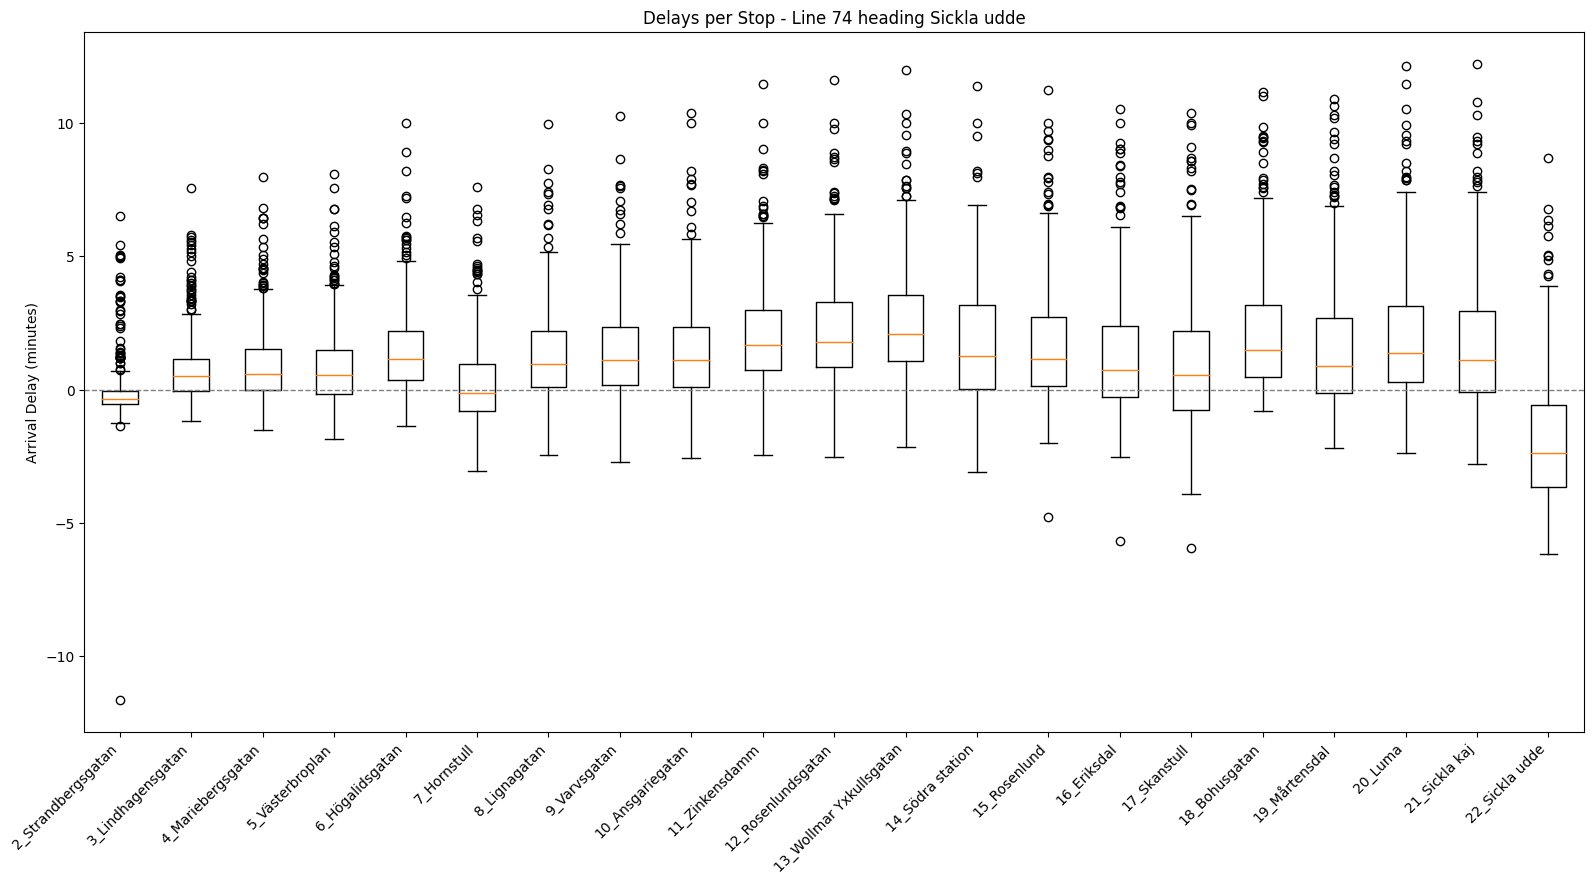

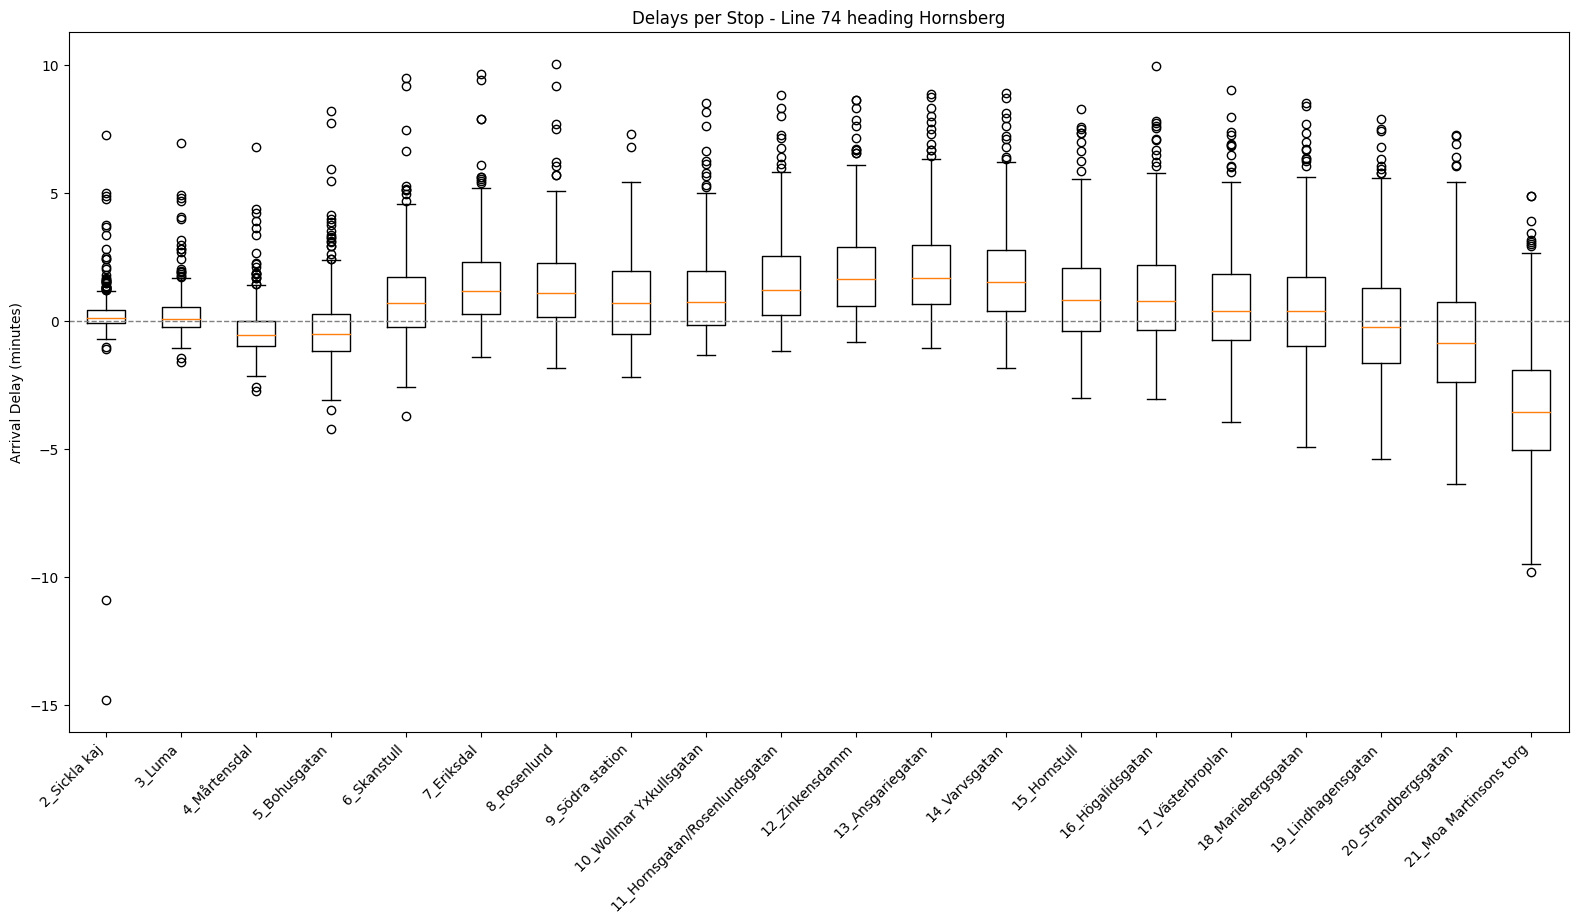

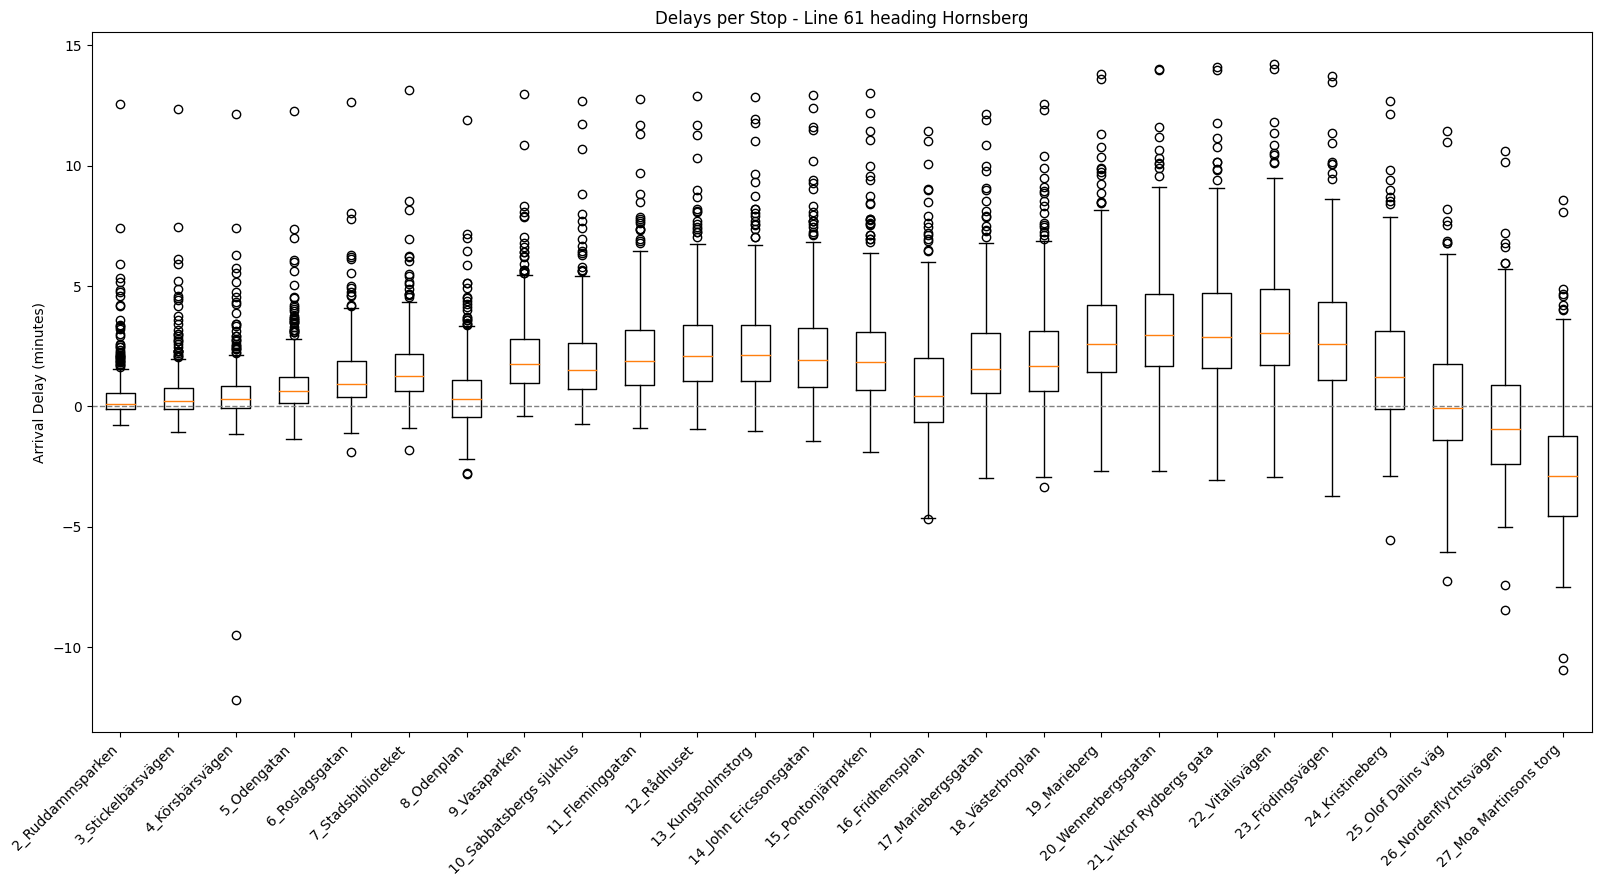

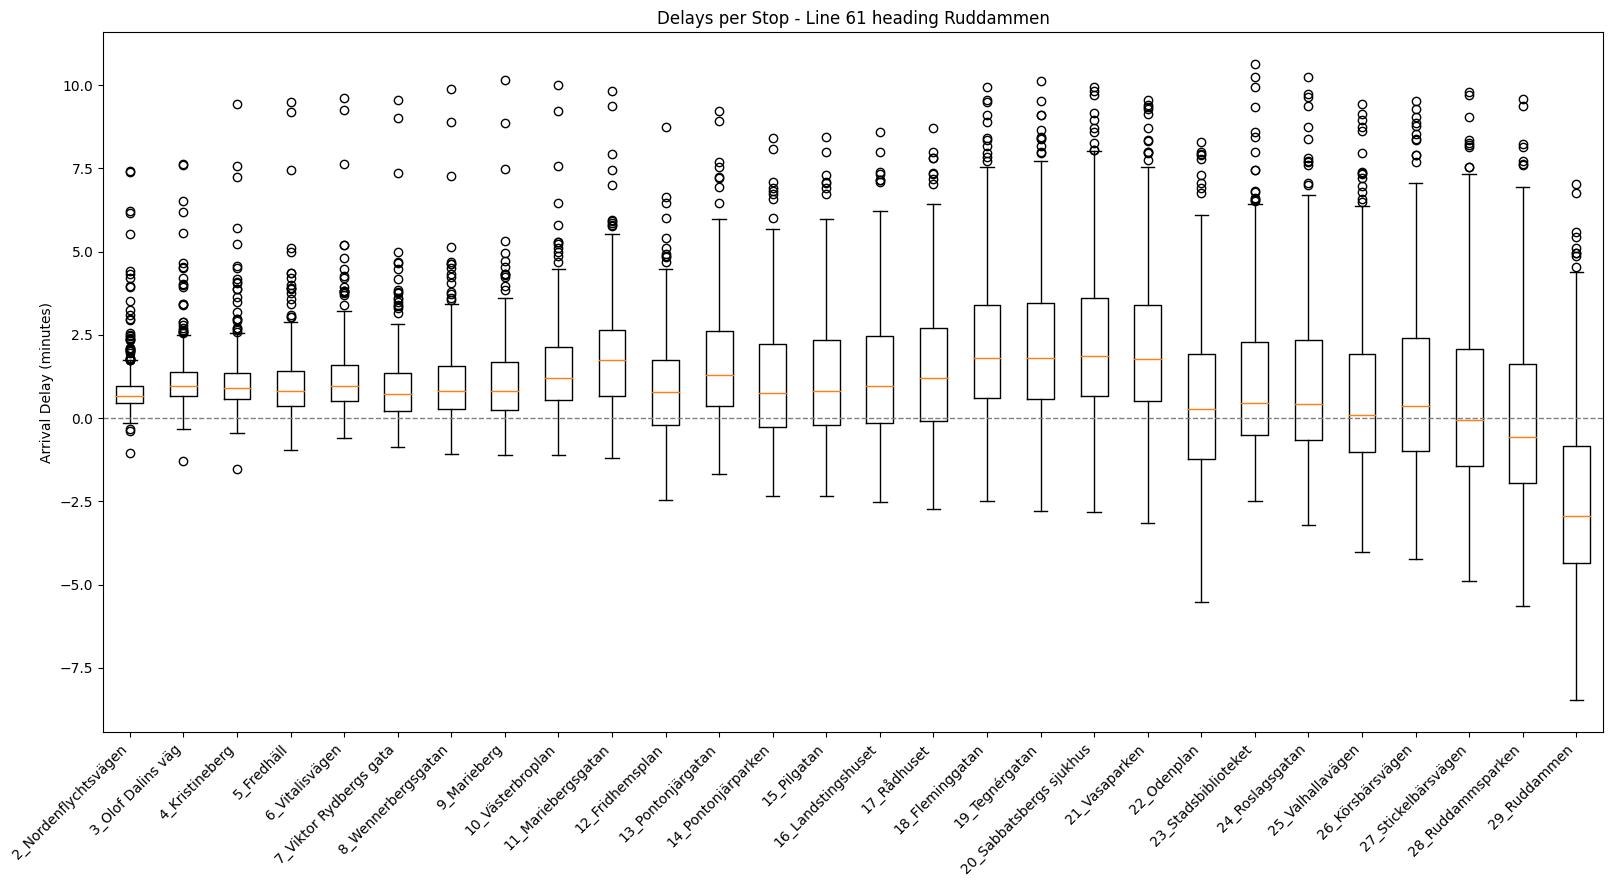

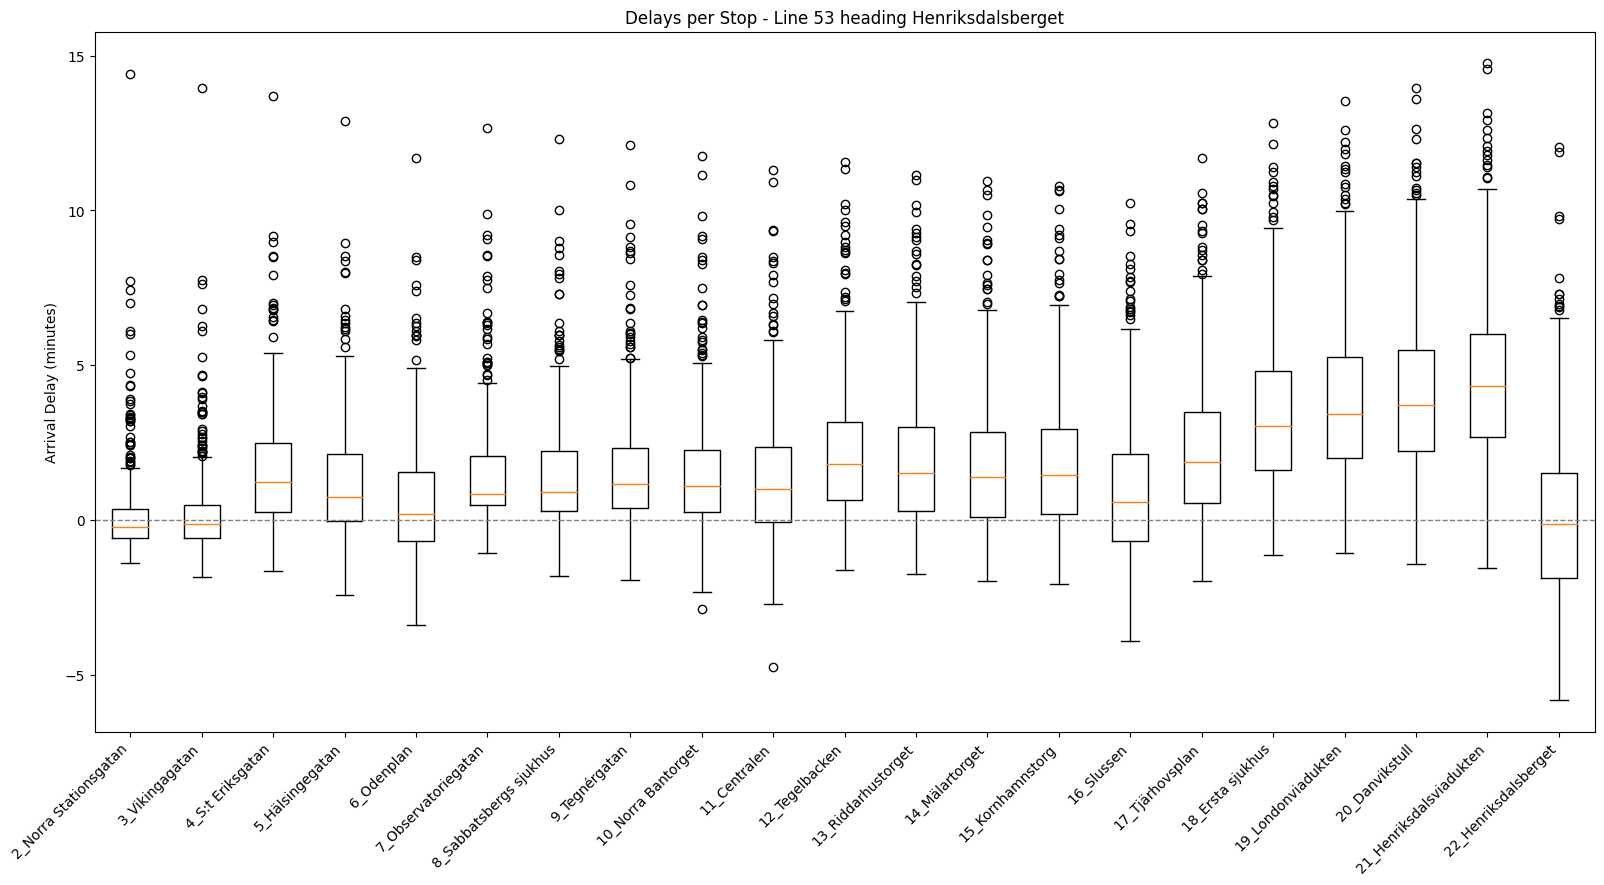

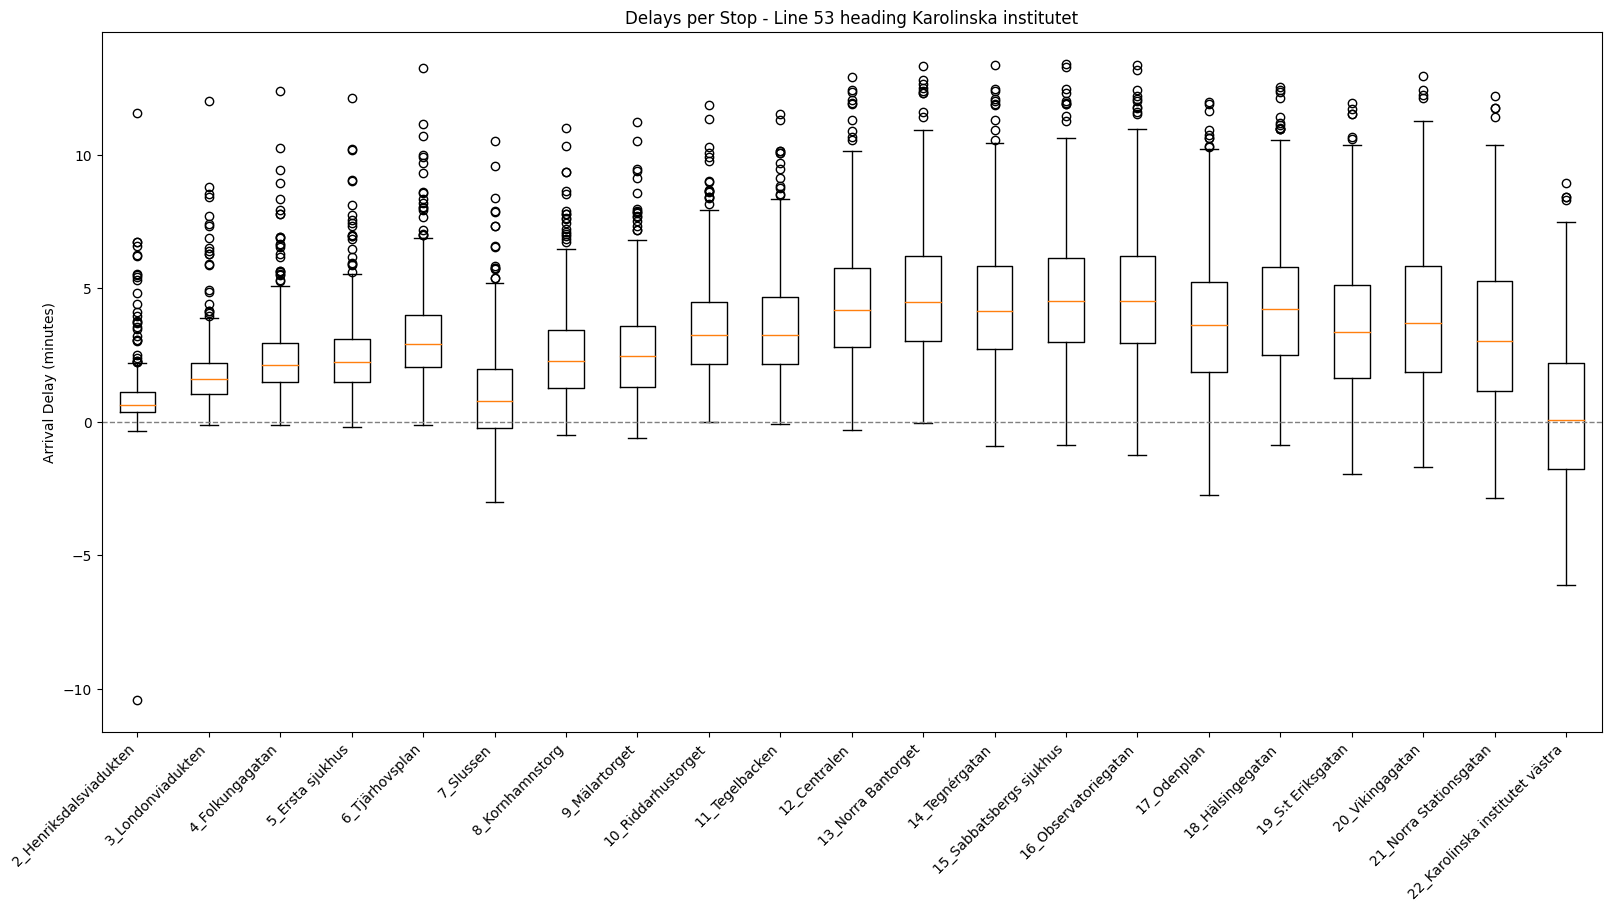

In [384]:
import matplotlib.pyplot as plt

performances_per_lines = {}

for line in df['route_short_name'].unique():
    for dest in df['stop_headsign'].unique():
        subset = df.loc[(df['route_short_name'] == line) & (df['stop_headsign'] == dest)]

        if subset.empty:
            continue

        d = []
        labels = []

        print(line)
        print(dest)
        print(subset['stop_sequence_sched'].unique())

        performances_per_lines[str(line) + '_' + dest] = subset

        for stop in sorted(subset['stop_sequence_sched'].unique()):
            if stop == 1:
                continue
            stop_subset = subset.loc[subset['stop_sequence_sched'] == stop]
            values = stop_subset['arrival_delay_minutes'].dropna().values

            if len(values) > 0:
                stop_name = stop_subset['stop_name'].iloc[0]
                d.append(values)
                labels.append(f"{stop}_{stop_name}")

        if d:  # ne trace le graphe que s'il y a des données
            fig = plt.figure(figsize=(15, 7))
            ax = fig.add_axes([0, 0, 1, 1])
            bp = ax.boxplot(d)
            ax.set_xticklabels(labels, rotation=45, ha='right')
            plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

            ax.set_ylabel("Arrival Delay (minutes)")
            ax.set_title(f"Delays per Stop - Line {line} heading {dest}")

plt.show()


In [385]:
performances_per_lines.keys()

dict_keys(['74_Sickla udde', '74_Hornsberg', '61_Hornsberg', '61_Ruddammen', '53_Henriksdalsberget', '53_Karolinska institutet'])

## Ajouter les % de ROW

In [386]:
#mettre stop_sequence_sched dans tous les fichiers
for key in performances_per_lines.keys():
    path = "C:/Users/chloe/Downloads/row_percentage_segment_line" + key + ".csv"
    ROW = pd.read_csv(path, sep =';')
    ROW = ROW.rename(columns={'stop_sequence_real': 'stop_sequence_real_ROW','route_short_name': 'route_short_name_ROW'})
    #performances_per_lines[key]
    performances_per_lines[key]=performances_per_lines[key].merge(ROW[['stop_sequence_real_ROW','percentage','route_short_name_ROW']], left_on='stop_sequence_sched', right_on='stop_sequence_real_ROW', how='left')

In [387]:
performances_per_lines['74_Sickla udde'].head()

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time,stop_sequence_real_ROW,percentage,route_short_name_ROW
0,14010000664218434,20250310,0,1,9022001010262001,2025-03-10 06:02:14,-106.0,2025-03-10 06:04:03,3.0,74,...,18.004969,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-1.766667,0 days 00:01:49,1,"0,000000000000000",74
1,14010000664218434,20250310,0,2,9022001010429004,2025-03-10 06:05:18,-10.0,2025-03-10 06:05:28,0.0,74,...,18.008290,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-15-18Z.pb,-0.166667,0 days 00:00:10,2,"0,000000000000000",74
2,14010000664218434,20250310,0,3,9022001010473002,2025-03-10 06:06:53,-10.0,2025-03-10 06:07:11,8.0,74,...,18.016235,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-17-09Z.pb,-0.166667,0 days 00:00:18,3,"0,000000000000000",74
3,14010000664218434,20250310,0,4,9022001010421001,2025-03-10 06:09:12,0.0,2025-03-10 06:09:21,9.0,74,...,18.023381,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-19-58Z.pb,0.000000,0 days 00:00:09,4,"0,085106382978723",74
4,14010000664218434,20250310,0,5,9022001010645001,2025-03-10 06:10:52,18.0,2025-03-10 06:11:04,30.0,74,...,18.022024,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T06-21-35Z.pb,0.300000,0 days 00:00:12,5,"0,906862745098039",74


## Plots

In [388]:

key = '61_Hornsberg'
df_plots = performances_per_lines[key]
path = "C:/Users/chloe/Downloads/row_percentage_segment_line" + key + ".csv"
ROW = pd.read_csv(path, sep =';')

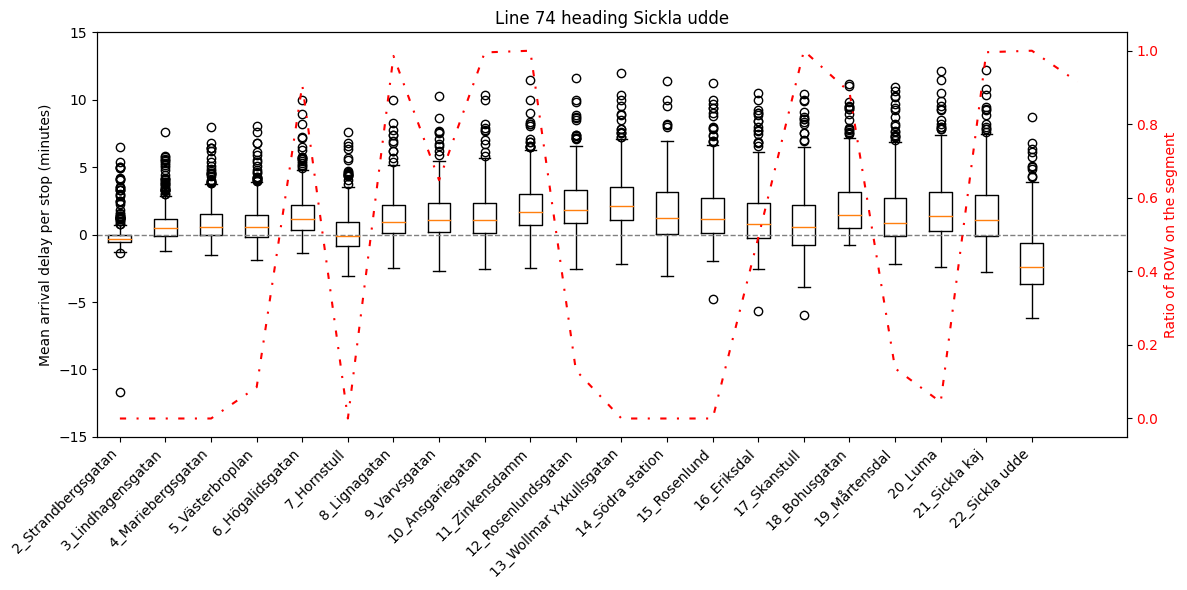

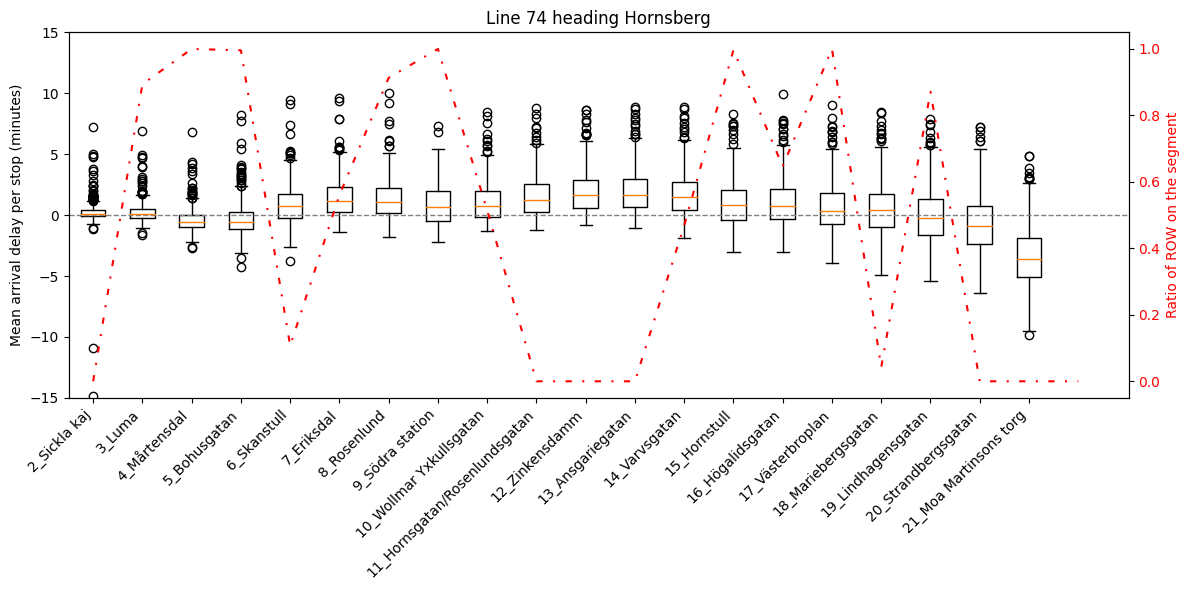

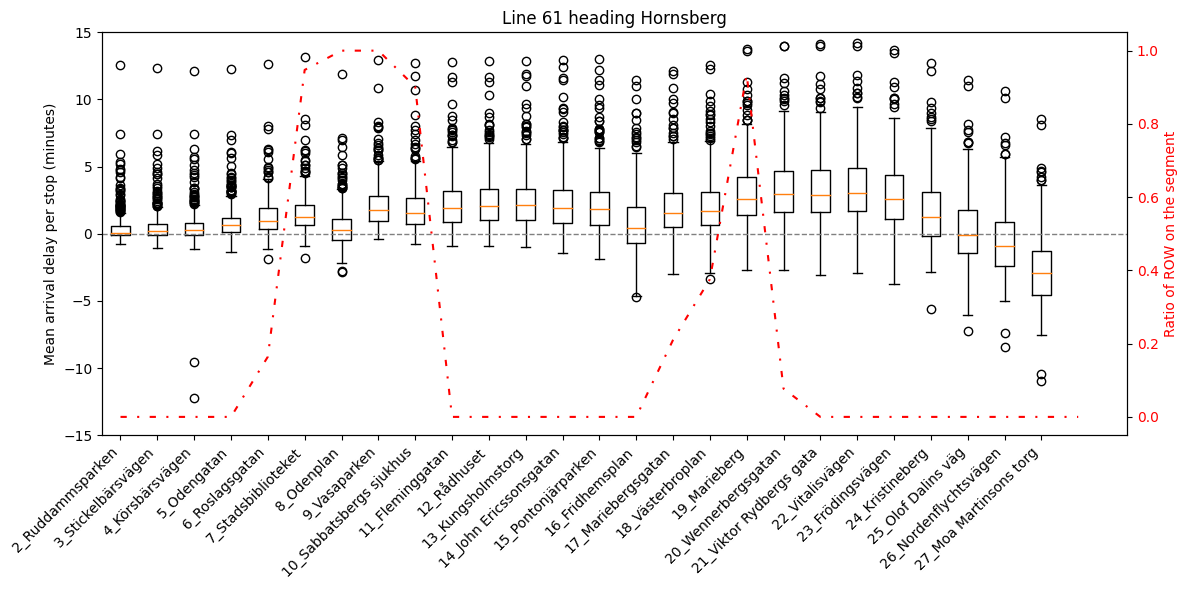

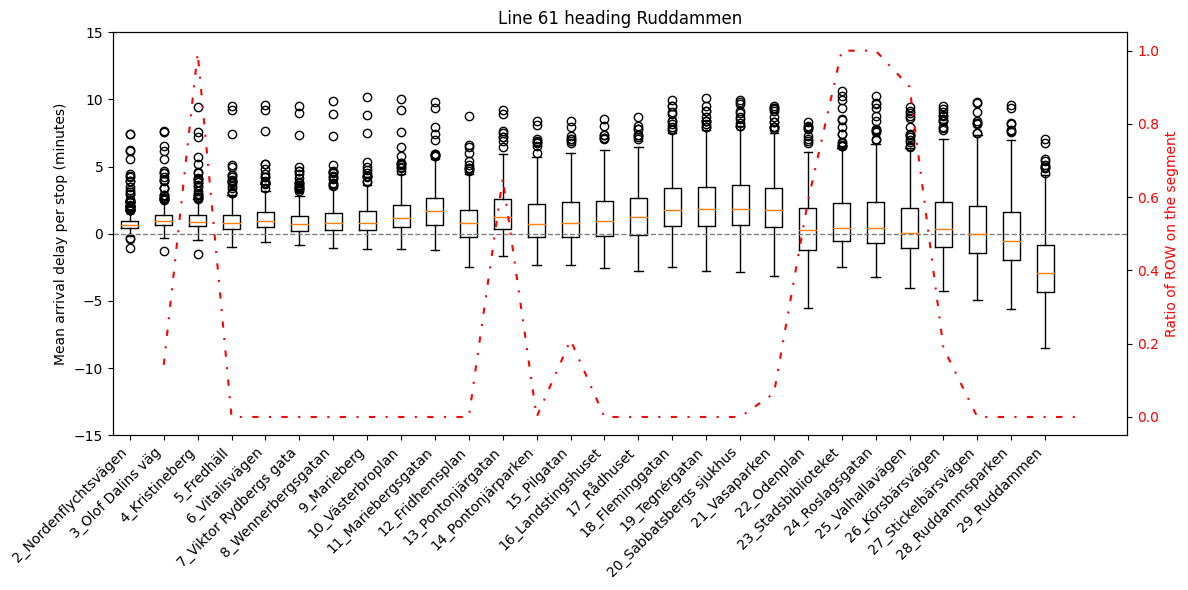

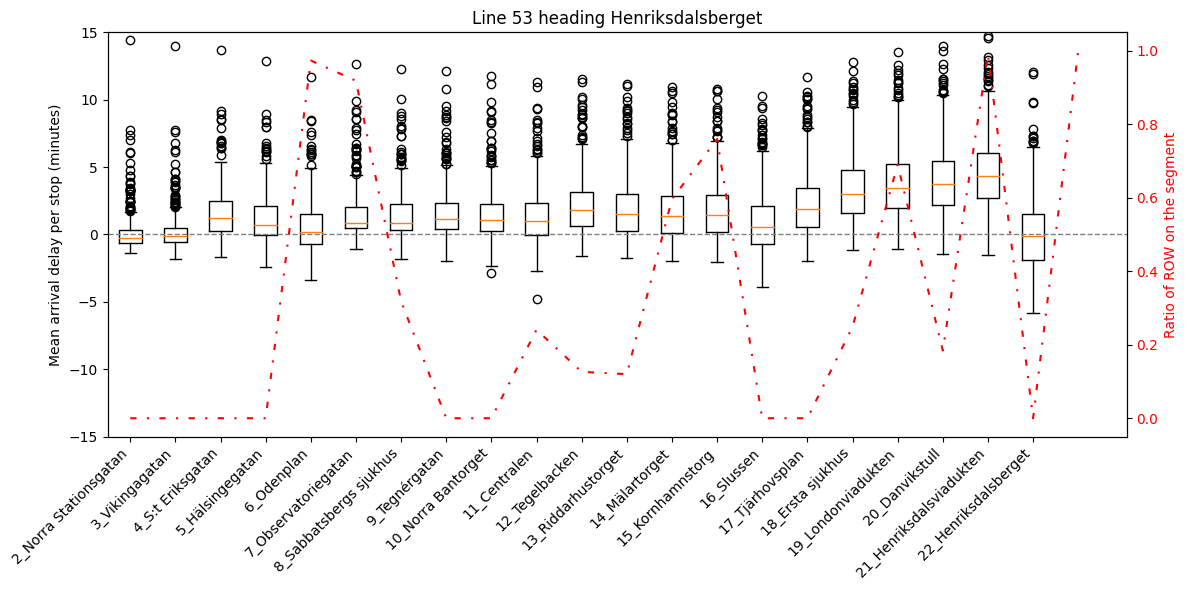

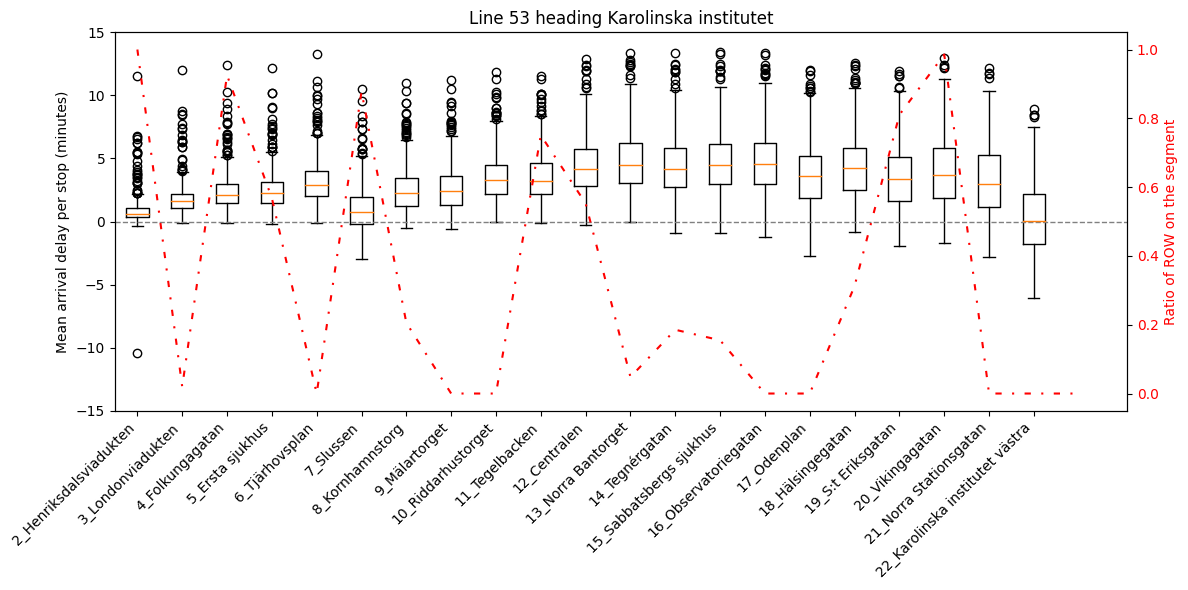

In [416]:
import matplotlib.pyplot as plt
import pandas as pd

def trace(key):

    subset = performances_per_lines[key]
    path = "C:/Users/chloe/Downloads/row_percentage_segment_line" + key + ".csv"
    line = subset['route_short_name'].unique()[0]
    dest = subset['stop_headsign'].unique()[0]
    ROW = pd.read_csv(path, sep=';')

    d = []        # To hold the delay values for each stop
    labels = []   # To hold x-axis labels


    # Iterate over sorted unique stops
    for stop in sorted(subset['stop_sequence_sched'].unique()):
        if stop == 1:
            continue

        stop_subset = subset.loc[subset['stop_sequence_sched'] == stop]
        values = stop_subset['arrival_delay_minutes'].dropna().values

        if len(values) > 0:
            stop_name = stop_subset['stop_name'].iloc[0]
            d.append(values)
            labels.append(f"{stop}_{stop_name}")

    # Plotting
    if d:  # Only plot if data exists
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        bp = ax1.boxplot(d)
        ax1.set_ylim(-15,15)
        ax1.set_xticklabels(labels, rotation=45, ha='right')
        ax1.axhline(y=0, color='gray', linestyle='--', linewidth=1)

        ax1.set_ylabel("Mean arrival delay per stop (minutes)")
        ax1.set_title(f"Line {line} heading {dest}")

        # Création du second axe Y (partage le même axe X)
        ax2 = ax1.twinx()

        # Tracé de la deuxième courbe (pourcentages)
        ax2.plot(ROW['stop_sequence_real'], ROW['percentage'], color='red', label='Percentages', linestyle=(0, (3,5,1,5)))
        ax2.set_ylabel('Ratio of ROW on the previous segment', color='red')
        ax2.tick_params(axis='y', labelcolor='red')

        plt.tight_layout()
        plt.show()      
               
    plt.show()
    
for key in performances_per_lines.keys():
    trace(key)

In [394]:
subset

,trip_id,start_date,schedule_relationship,stop_sequence_real,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name,...,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time,stop_sequence_real_ROW,percentage,route_short_name_ROW
0,14010000664357958,20250309,0,7,9022001010188001,2025-03-09 23:49:59,90.0,2025-03-09 23:50:07,98.0,61,...,18.054827,0,9.021001e+15,NaN,sl-tripupdates-2025-03-09T23-59-37Z.pb,1.500000,0 days 00:00:08,7,1,61
1,14010000664357958,20250309,0,8,9022001010151001,2025-03-09 23:51:00,60.0,2025-03-09 23:51:08,68.0,61,...,18.049194,0,9.021001e+15,G,sl-tripupdates-2025-03-10T00-00-46Z.pb,1.000000,0 days 00:00:08,8,1,61
2,14010000664357958,20250309,0,9,9022001010278002,2025-03-09 23:51:58,74.0,2025-03-09 23:51:58,74.0,61,...,18.045989,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-01-42Z.pb,1.233333,0 days 00:00:00,9,"0,901515152",61
3,14010000664357958,20250309,0,10,9022001010280002,2025-03-09 23:52:45,50.0,2025-03-09 23:52:45,50.0,61,...,18.048542,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-02-25Z.pb,0.833333,0 days 00:00:00,10,0,61
4,14010000664357958,20250309,0,11,9022001010583001,2025-03-09 23:54:32,31.0,2025-03-09 23:54:32,31.0,61,...,18.044909,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-04-30Z.pb,0.516667,0 days 00:00:00,11,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12535,14010000664323055,20250320,0,23,9022001010902001,2025-03-21 00:06:44,44.0,2025-03-21 00:06:50,50.0,61,...,18.003085,0,9.021001e+15,NaN,sl-tripupdates-2025-03-20T23-59-31Z.pb,0.733333,0 days 00:00:06,23,0,61
12536,14010000664323055,20250320,0,24,9022001010437002,2025-03-21 00:07:16,-16.0,2025-03-21 00:07:19,-13.0,61,...,18.003001,0,9.021001e+15,NaN,sl-tripupdates-2025-03-20T23-59-31Z.pb,-0.266667,0 days 00:00:03,24,0,61
12537,14010000664323055,20250320,0,25,9022001010435002,2025-03-21 00:08:12,-61.0,2025-03-21 00:08:12,-61.0,61,...,18.004281,0,9.021001e+15,NaN,sl-tripupdates-2025-03-20T23-59-31Z.pb,-1.016667,0 days 00:00:00,25,0,61
12538,14010000664323055,20250320,0,26,9022001010433002,2025-03-21 00:08:44,-89.0,2025-03-21 00:08:44,-89.0,61,...,18.007506,0,9.021001e+15,NaN,sl-tripupdates-2025-03-20T23-59-31Z.pb,-1.483333,0 days 00:00:00,26,0,61


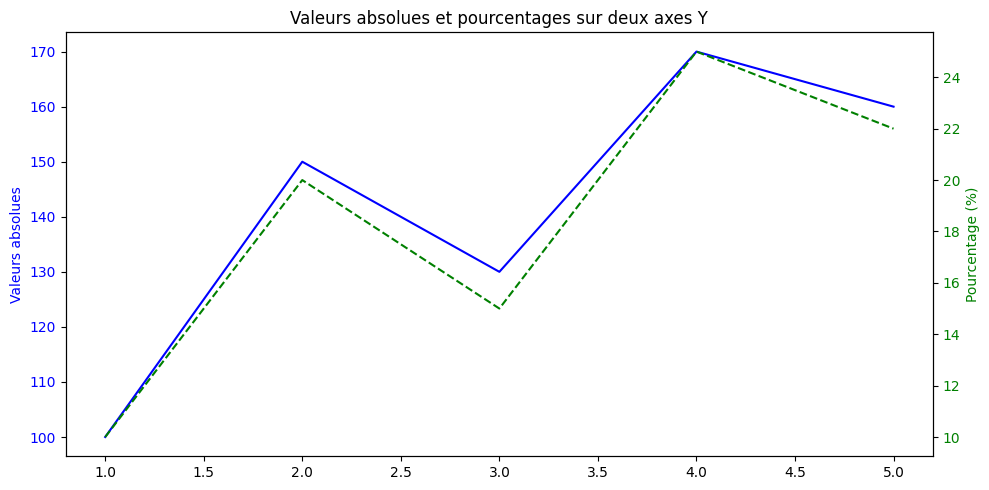

In [348]:
import matplotlib.pyplot as plt

# Données fictives
x = [1, 2, 3, 4, 5]
valeurs_absolues = [100, 150, 130, 170, 160]
pourcentages = [10, 20, 15, 25, 22]

# Création de la figure et du premier axe
fig, ax1 = plt.subplots(figsize=(10, 5))

# Tracé de la première courbe (valeurs absolues)
ax1.plot(x, valeurs_absolues, color='blue', label='Valeurs absolues')
ax1.set_ylabel('Valeurs absolues', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Création du second axe Y (partage le même axe X)
ax2 = ax1.twinx()

# Tracé de la deuxième courbe (pourcentages)
ax2.plot(x, pourcentages, color='green', label='Pourcentages', linestyle='--')
ax2.set_ylabel('Pourcentage (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Ajout d'un titre et affichage
plt.title('Valeurs absolues et pourcentages sur deux axes Y')
fig.tight_layout()
plt.show()


In [318]:
test

,trip_id,start_date,schedule_relationship,stop_sequence_real_x,stop_id,arrival_time_real,arrival_delay,departure_time_real,departure_delay,route_short_name_x,...,stop_lon,location_type,parent_station,platform_code,file,arrival_delay_minutes,dwell_time,stop_sequence_real_y,percentage,route_short_name_y
0,14010000664357958,20250309,0,7,9022001010188001,2025-03-09 23:49:59,90.0,2025-03-09 23:50:07,98.0,61,...,18.054827,0,9.021001e+15,NaN,sl-tripupdates-2025-03-09T23-59-37Z.pb,1.500000,0 days 00:00:08,7,1,61
1,14010000664357958,20250309,0,8,9022001010151001,2025-03-09 23:51:00,60.0,2025-03-09 23:51:08,68.0,61,...,18.049194,0,9.021001e+15,G,sl-tripupdates-2025-03-10T00-00-46Z.pb,1.000000,0 days 00:00:08,8,1,61
2,14010000664357958,20250309,0,9,9022001010278002,2025-03-09 23:51:58,74.0,2025-03-09 23:51:58,74.0,61,...,18.045989,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-01-42Z.pb,1.233333,0 days 00:00:00,9,"0,901515152",61
3,14010000664357958,20250309,0,10,9022001010280002,2025-03-09 23:52:45,50.0,2025-03-09 23:52:45,50.0,61,...,18.048542,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-02-25Z.pb,0.833333,0 days 00:00:00,10,0,61
4,14010000664357958,20250309,0,11,9022001010583001,2025-03-09 23:54:32,31.0,2025-03-09 23:54:32,31.0,61,...,18.044909,0,9.021001e+15,NaN,sl-tripupdates-2025-03-10T00-04-30Z.pb,0.516667,0 days 00:00:00,11,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,14010000664323055,20250313,0,23,9022001010902001,2025-03-14 00:09:40,220.0,2025-03-14 00:09:45,225.0,61,...,18.003085,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,3.666667,0 days 00:00:05,23,0,61
6363,14010000664323055,20250313,0,24,9022001010437002,2025-03-14 00:10:18,166.0,2025-03-14 00:10:22,170.0,61,...,18.003001,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,2.766667,0 days 00:00:04,24,0,61
6364,14010000664323055,20250313,0,25,9022001010435002,2025-03-14 00:10:49,96.0,2025-03-14 00:10:49,96.0,61,...,18.004281,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,1.600000,0 days 00:00:00,25,0,61
6365,14010000664323055,20250313,0,26,9022001010433002,2025-03-14 00:10:56,43.0,2025-03-14 00:10:56,43.0,61,...,18.007506,0,9.021001e+15,NaN,sl-tripupdates-2025-03-13T23-59-31Z.pb,0.716667,0 days 00:00:00,26,0,61


In [88]:
dest = '74_Sickla udde'
df = performances_per_lines[dest]
df_trips = df.groupby('trip_id').agg(
    start_date=pd.NamedAgg(column="departure_time_real", aggfunc="min"),
    mean_dwell_time = pd.NamedAgg(column="dwell_time", aggfunc="mean"),
    mean_arrival_delay = pd.NamedAgg(column="arrival_delay_minutes", aggfunc="mean"),
    max_arrival_delay = pd.NamedAgg(column="arrival_delay_minutes", aggfunc="max"))

In [89]:
df_trips

,start_date,mean_dwell_time,mean_arrival_delay,max_arrival_delay
trip_id,,,,
14010000664218434,2025-03-10 06:04:03,0 days 00:00:12.519230769,3.430769,7.100000
14010000664219036,2025-03-10 06:24:17,0 days 00:00:16.730769230,1.205128,4.000000
14010000664219560,2025-03-10 06:44:51,0 days 00:00:15.480769230,0.631090,3.083333
14010000664220110,2025-03-10 07:02:01,0 days 00:00:24.852272727,-0.260795,2.416667
14010000664220397,2025-03-10 07:12:13,0 days 00:00:33.147727272,1.087500,5.300000
14010000664221809,2025-03-10 07:52:12,0 days 00:00:27.829545454,1.272348,5.083333
14010000664222255,2025-03-10 08:02:16,0 days 00:00:28.102272727,1.588826,6.466667
14010000664222544,2025-03-10 08:12:39,0 days 00:00:26.840909090,2.344697,6.083333
14010000664223286,2025-03-10 08:32:51,0 days 00:00:19.852272727,1.236742,5.550000


df_trips

In [90]:
def func(val):
    if isinstance(val, str) and val != 'nan':
        return datetime.strptime(val, '%Y-%m-%d %H:%M:%S').strftime('%H:%M')
    else:
        return None

df_trips['start_hour']=pd.to_datetime(df_trips['start_date'].apply(lambda x: func(x)))

Text(0, 0.5, 'Arrival delay in minutes')

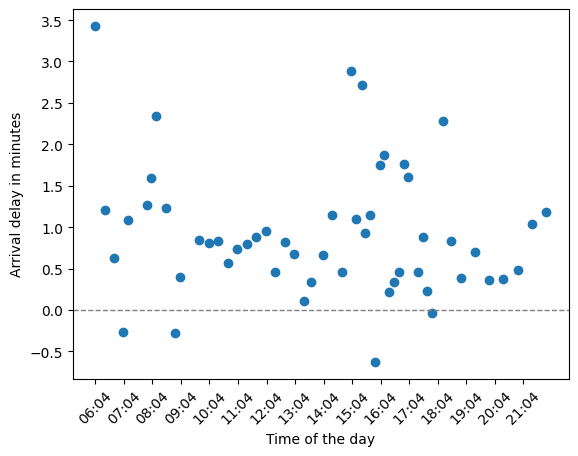

In [91]:
plt.scatter(df_trips['start_hour'],df_trips['mean_arrival_delay'])
# Format x-axis: ticks every 30 minutes
locator = pd.date_range(start=df_trips['start_hour'].min(),
                        end=df_trips['start_hour'].max(),
                        freq='1h')

plt.xticks(locator, [ts.strftime('%H:%M') for ts in locator], rotation=45)

# Optional: horizontal line (e.g., baseline at y=0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Time of the day")
plt.ylabel("Arrival delay in minutes")


Text(0, 0.5, 'Mean dwell time in minutes')

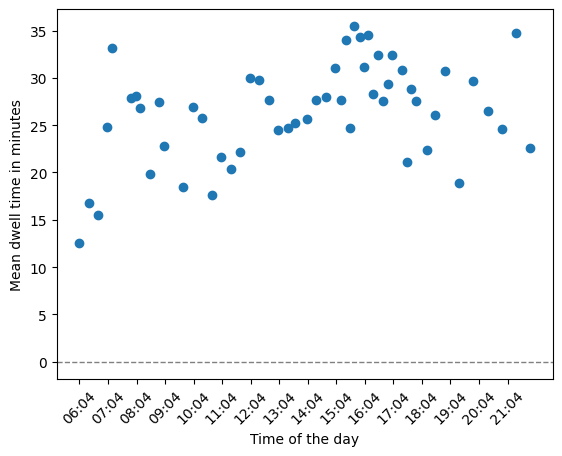

In [112]:
def func(val):
    return val.total_seconds()

plt.scatter(df_trips['start_hour'],df_trips['mean_dwell_time'].apply(lambda x: func(x)))
# Format x-axis: ticks every 30 minutes
locator = pd.date_range(start=df_trips['start_hour'].min(),
                        end=df_trips['start_hour'].max(),
                        freq='1h')

plt.xticks(locator, [ts.strftime('%H:%M') for ts in locator], rotation=45)

# Optional: horizontal line (e.g., baseline at y=0)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel("Time of the day")
plt.ylabel("Mean dwell time in seconds")

In [110]:
df_trips['mean_dwell_time'].dtype

dtype('<m8[ns]')

Text(0, 0.5, 'Maximum delay of the trip')

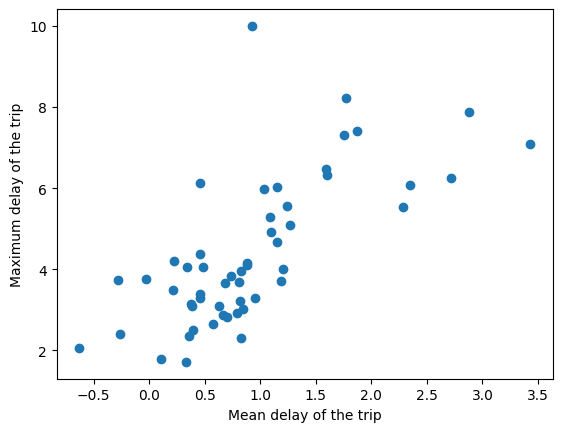

In [92]:
plt.scatter(df_trips['mean_arrival_delay'],df_trips['max_arrival_delay'])
plt.xlabel("Mean delay of the trip")
plt.ylabel("Maximum delay of the trip")